<a href="https://colab.research.google.com/github/sw01-prog/Projects2/blob/main/Airline_fair_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302




1. find outlier
2. find missing values
3. class imbalance
4. duplicate values
5. Data type inconsistencies
6. Standardization & Formatting

Ensure consistent units (e.g., cm vs inches, INR vs USD).

Fix inconsistent formatting (e.g., Male/Female vs M/F).

Trim spaces, lowercase/uppercase text where needed.

Standardize date formats (e.g., YYYY-MM-DD).
7. Integrity & Constraints

Check primary key uniqueness.

Verify foreign key relationships (no orphaned records).

Ensure values fall in expected ranges (e.g., age > 0, percentage ≤ 100).
8. Categorical Data Issues

Handle typos, spelling variations (CA vs Calif. vs California).

Merge rare categories if needed.

Ensure categorical levels are consistent across datasets.
9. Text Data Cleaning

Remove unwanted characters, HTML tags, emojis if not needed.

Handle inconsistent casing and whitespace.

Remove stopwords, apply stemming/lemmatization (for NLP tasks).
10. Data Integration

If combining multiple datasets:

Match schemas (column names, formats).

Resolve conflicts in column naming and values.

Handle join mismatches.
11. Feature Engineering Checks

Create derived features (e.g., extracting year from a date).

Check for redundant/collinear features (multicollinearity).

Drop irrelevant features.
12. Bias & Balance

For ML datasets: check for class imbalance.

Verify representation across key categories (no missing groups).



In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Nice catch 👌 This is a super common pandas pattern, so let me unpack it clearly.

You wrote:

```python
df[df.isnull().any(axis=1)]
```

---

### Step 1: `df.isnull()`

* Creates a **boolean DataFrame** (`True`/`False`) showing which cells are null.

Example:

```
   Route  Total_Stops
0  False       False
1   True       False
2  False        True
```

---

### Step 2: `.any(axis=1)`

* `axis=1` means *row-wise*.
* `.any(axis=1)` checks if **any value in the row** is `True`.
* The result is a **boolean Series** (one value per row):

```
0    False
1     True
2     True
dtype: bool
```

---

### Step 3: `df[...]`

* In pandas, when you put a **boolean Series inside `df[...]`**, it selects the rows where the Series is `True`.
* So here, you’re saying: *“Give me all rows where at least one column was null.”*

---

### Why `df` appears twice

* The first `df` is the DataFrame you want rows from.
* The second part `df.isnull().any(axis=1)` is just a **filter condition** that returns a boolean mask.

So the whole thing means:

> “From DataFrame `df`, select only the rows where any value is null.” ✅

---

👉 Think of it like in SQL:

```sql
SELECT * FROM df
WHERE (any column IS NULL);
```

---

Would you like me to also show you how the **boolean mask** actually looks before applying it, so you can see what’s happening behind the scenes?


In [ ]:
df.dropna(subset=["Total_Stops", "Route"].all(axis=1), inplace=True)

AttributeError: 'list' object has no attribute 'all'

In [ ]:
df.dropna(subset=["Total_Stops", "Route"], inplace=True)

inplace=True

By default, pandas returns a new DataFrame with the rows dropped, leaving the original unchanged.

With inplace=True, it directly modifies your existing df (no need to reassign).

In [ ]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


object → usually stores strings.

But it can also hold mixed Python objects (e.g., some strings, some numbers, maybe even lists)

1 feature belong to int64 nature  , ie
Variations of int are : ('int64','int32','int16') in numpy library..

The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than
32 bit floats.They also allow much larger numbers to be stored..


In [ ]:
### In order to more accurate memory usage , u can leverage memory_usage="deep" in info()
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.5 MB


In [ ]:
dt= df.copy()

In [ ]:
def chagne_column_orint(col):
  dt[col]=pd.to_datetime(dt[col])

In [ ]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
  chagne_column_orint(feature)

/tmp/ipython-input-1598419009.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt[col]=pd.to_datetime(dt[col])
/tmp/ipython-input-1598419009.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt[col]=pd.to_datetime(dt[col])
/tmp/ipython-input-1598419009.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt[col]=pd.to_datetime(dt[col])


In [ ]:
dt.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
dt['j_month']= dt['Date_of_Journey'].dt.month
dt['j_year']= dt['Date_of_Journey'].dt.year
dt['j_day']= dt['Date_of_Journey'].dt.day

In [ ]:
dt.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-09-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-13 05:50:00,2025-09-13 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,6,2019,9


Cleaning up arrival and dept time

In [ ]:
def extract_min_hr(df, col):
   df[col+'_hour']=df[col].dt._hour
   df[col+'_min']=df[col].dt._minute
   return df.head(3)

In [ ]:
dt.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-09-12 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-12 05:50:00,2025-09-12 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-12 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,6,2019,9


In [ ]:
extract_min_hr(dt, 'Arrival_Time')
extract_min_hr(dt, 'Dep_Time')


AttributeError: 'DatetimeProperties' object has no attribute '_hour'

In [ ]:
def extract_min_hr(df, col):
   df[col+'hour']=df[col].dt.hour
   df[col+'min']=df[col].dt.minute
   return df.head(3)

In [ ]:
extract_min_hr(dt, 'Arrival_Time')
extract_min_hr(dt, 'Dep_Time')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-09-13 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-09-13 05:50:00,2025-09-13 13:15:00,7h 25m,2 stops,No info,7662,5,2019,1,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-09-13 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,6,2019,9,4,25,9,25


axis=1 (rows), axis=0

# drop

Used to remove rows or columns by labels (names) or index positions.

You tell pandas which rows/columns you want gone
#  dropna

Used to remove rows (or columns) with missing values (NaN).

You don’t specify exact labels; pandas checks for nulls



and removes accordingly.

In [ ]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
dt1=dt.drop(['Arrival_Time', 'Dep_Time'], axis=1)

In [ ]:
dt1.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Duration,object
Total_Stops,object
Additional_Info,object
Price,int64
j_month,int32


In [ ]:
dt1.shape

(10682, 16)

lets analyse when will most of the flights take-off..

In [ ]:
dt.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'j_month', 'j_year', 'j_day',
       'Arrival_Timehour', 'Arrival_Timemin', 'Dep_Timehour', 'Dep_Timemin'],
      dtype='object')

converting flight departure time

In [ ]:
def flight_time(x):
   if (x>4) and (x<=8):
     return 'early morning'
   elif (x>8) and (x<=12):
      return 'morning'
   elif (x>12) and (x<=16):
      return 'noon'
   elif (x>16) and (x<=20):
      return 'evening'
   elif (x>20) and (x<=24):
       return 'night'
   else:
       return 'late night'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dt('Dep_Timehour').apply(flight_time).value_counts().plot(kind='bar')

TypeError: 'DataFrame' object is not callable

<Axes: xlabel='Dep_Timehour'>

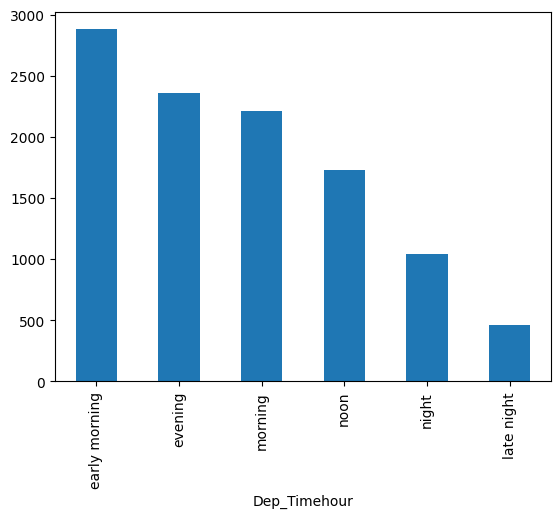

In [ ]:
dt1['Dep_Timehour'].apply(flight_time).value_counts().plot(kind='bar')

No need to use this

In [ ]:
## how to use Plotly interactive plots directly with Pandas dataframes, First u need below set-up !

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.


In [ ]:
dt1['Dep_Timehour'].apply(flight_time).value_counts().iplot(kind="bar")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of bar.marker.line
        Received value: 'rgba(255, 153, 51, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to bar.marker.line.colorscale
      - A list or array of any of the above

Pre-process Duration Feature & extract meaningful features from it..

-->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..

-->> As my ML model is not able to understand this duration as it contains string values ,
thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [ ]:
def preprocess_dur(x):
  if 'h' not in x:
    x= 'h'+''+x
  elif 'm' not in x:
    x= x+''+'m'
  return x

In [ ]:
dt['Duration']= dt['Duration'].apply(preprocess_dur)

In [ ]:
dt['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19hm
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3hm
10681,2h 40m


THE WAY i wanted (h m) it did not happen, lets try again

In [ ]:
def preprocess_dur(x):
  if 'h' not in x:
    x= '0h' + ' ' + x
  elif 'm' not in x:
    x= x + ' ' + '0m'
  return x

In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [ ]:
dt1['Duration']= dt1['Duration'].apply(preprocess_duration)


In [ ]:
dt1['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


there wasa problem with the dataframes, i dont know why the desired structure in duration column didnt appear in the copied df but appeared in og df

In [ ]:
dt1. dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Duration,object
Total_Stops,object
Additional_Info,object
Price,int64
j_month,int32


'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration
    bcz it is string data so any how we have to convert it into numerical(integer of float) values

'''

In [ ]:
# Now split into hours and minutes
dt1["dur_hour"] = dt1["Duration"].str.extract(r'(\d+)h').astype(int)
dt1["dur_mins"]  = dt1["Duration"].str.extract(r'(\d+)m').astype(int)

print(dt1)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route Duration Total_Stops Additional_Info  Price  \
0                  BLR → DEL   2h 50m    non-stop         No info   3897   
1      CCU → IXR → BBI → BLR   7h 25m     2 stops         No info   7662   
2      DEL → LKO → BOM → COK   19h 0m     2 stops  

Great question 👌 let’s break down this line carefully:

```python
df["Duration"].str.extract(r'(\d+)h')
```

---

### 🔎 Step by step

#### 1. `df["Duration"].str`

* The `.str` accessor lets you apply **string methods** (like regex, split, etc.) directly on a pandas Series.
* So here we’re telling pandas: *“treat every value in `Duration` like a string.”*

---

#### 2. `.extract(...)`

* `.extract()` is used with a **regular expression (regex)** to pull out matching text into a new column/Series.

---

#### 3. The regex: `r'(\d+)h'`

* `r'...'` → the `r` means *raw string*, so backslashes `\` are treated literally (not as escape characters).
* `\d` → matches any digit (0–9).
* `+` → means "one or more of the preceding thing".
* `(\d+)` → the **parentheses** make it a *capturing group*, so the actual digits are extracted.
* `h` → matches the literal letter `"h"`.

✅ So, `(\d+)h` means:

> "Find one or more digits followed by the letter `h`, and capture only the digits."

---

#### 4. Example

```python
import pandas as pd

df = pd.DataFrame({"Duration": ["2h 50m", "12h 5m", "0h 30m"]})

print(df["Duration"].str.extract(r'(\d+)h'))
```

Output:

```
     0
0    2
1   12
2    0
```

Only the **numbers before `h`** are extracted.

---

### 🔹 Similarly

* `r'(\d+)m'` → extracts the number before `m`.

So together:

* `(\d+)h` → gives hours.
* `(\d+)m` → gives minutes.

---

Do you want me to also explain what would happen if we **removed the parentheses `()`** from the regex?


In [ ]:
#df[col]=df[col].str.extract(r'(\d+)h').astype(int)

In [ ]:
dt1['dur_totalmin']= dt1['dur_hour']*60+dt1['dur_mins']

In [ ]:
dt1['dur_totalmin']

,dur_totalmin
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [ ]:
dt1.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Duration,object
Total_Stops,object
Additional_Info,object
Price,int64
j_month,int32


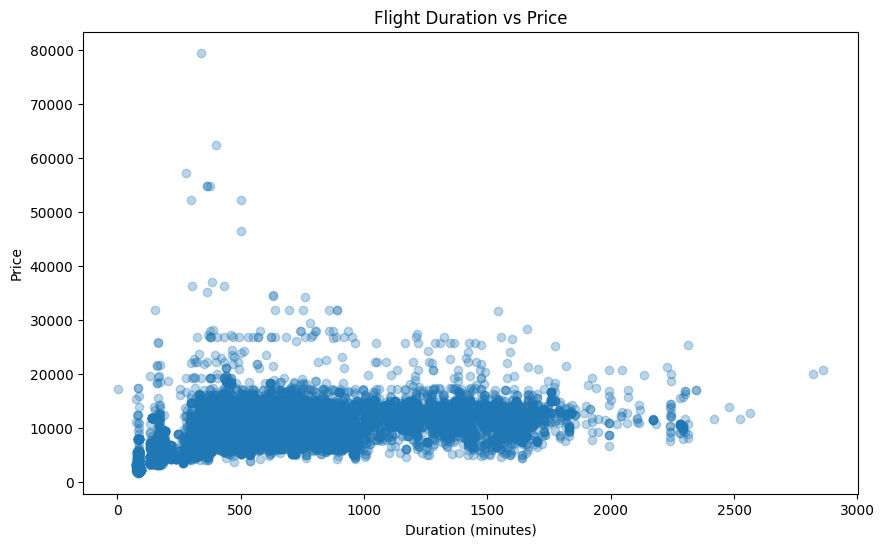

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(dt1["dur_totalmin"], dt1["Price"], alpha=0.3)
plt.xlabel("Duration (minutes)")
plt.ylabel("Price")
plt.title("Flight Duration vs Price")
plt.show()

Hexbin Plot (better for large datasets)

Groups points into hexagonal bins, showing density of points.

Perfect for 10k+ rows to avoid scatter clutter.

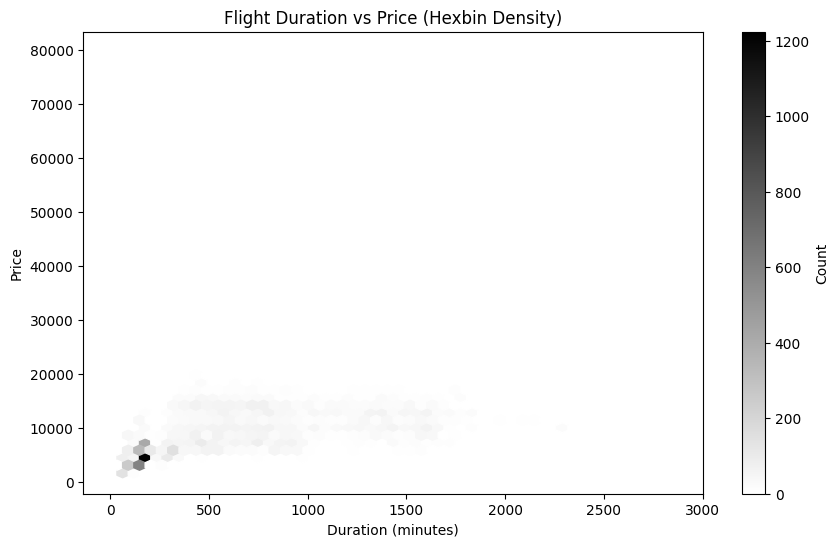

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(dt1["dur_totalmin"], dt1["Price"], gridsize=50, cmap="binary")
plt.colorbar(label="Count")
plt.xlabel("Duration (minutes)")
plt.ylabel("Price")
plt.title("Flight Duration vs Price (Hexbin Density)")
plt.show()


Box Plot (if you want distribution insight)

Bucket duration into ranges (short, medium, long flights).

Compare price distributions across these ranges.

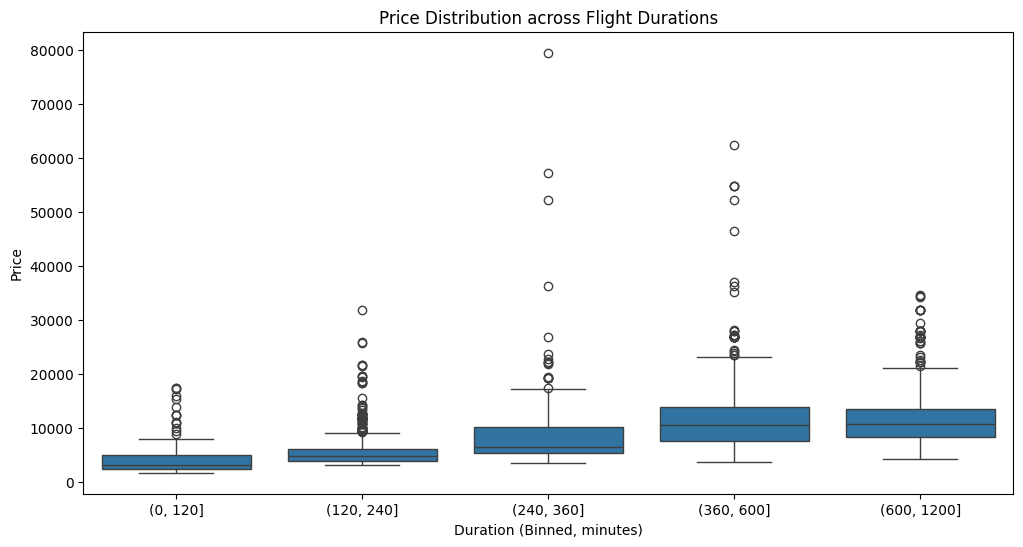

In [ ]:
import seaborn as sns

# Create bins for duration
dt1["Duration_Bins"] = pd.cut(dt1["dur_totalmin"], bins=[0,120,240,360,600,1200])

plt.figure(figsize=(12,6))
sns.boxplot(x="Duration_Bins", y="Price", data=dt1)
plt.xlabel("Duration (Binned, minutes)")
plt.ylabel("Price")
plt.title("Price Distribution across Flight Durations")
plt.show()


Violin Plot (better for distribution shape)

Gives you distribution density along with median.

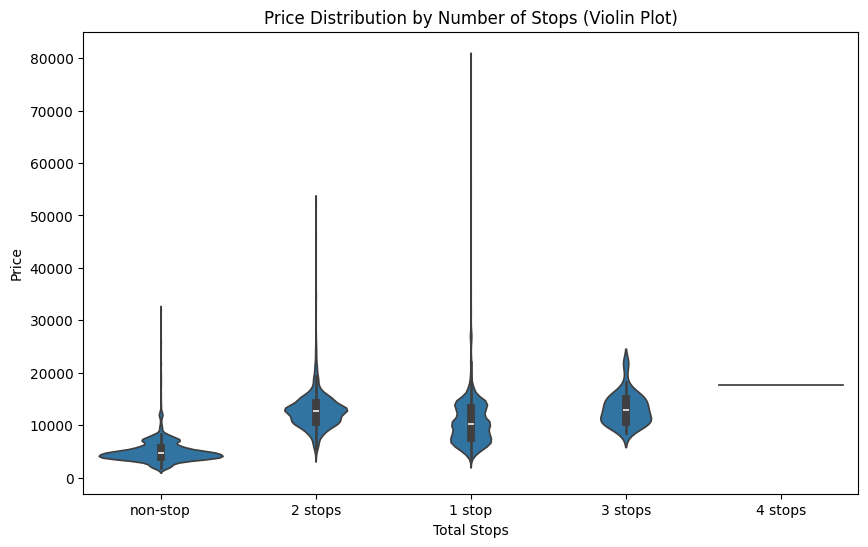

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Total_Stops", y="Price", data=dt1, inner="box")
plt.xlabel("Total Stops")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Stops (Violin Plot)")
plt.show()


Bar Plot (average price per stop category)

Shows the mean price for each stop category.

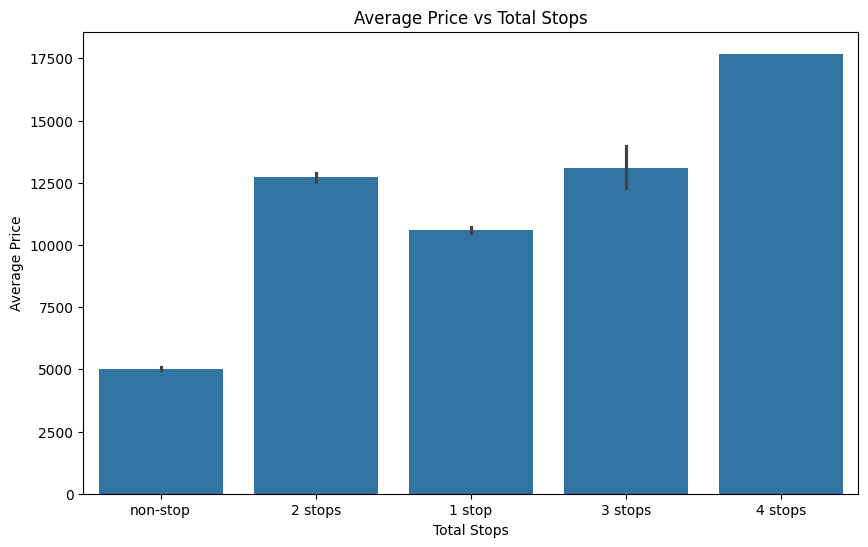

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Total_Stops", y="Price", data=dt1, estimator=lambda x: x.mean())
plt.xlabel("Total Stops")
plt.ylabel("Average Price")
plt.title("Average Price vs Total Stops")
plt.show()


Performing Airline vs Price Analysis..
    ie find price distribution & 5-point summary of each Airline..

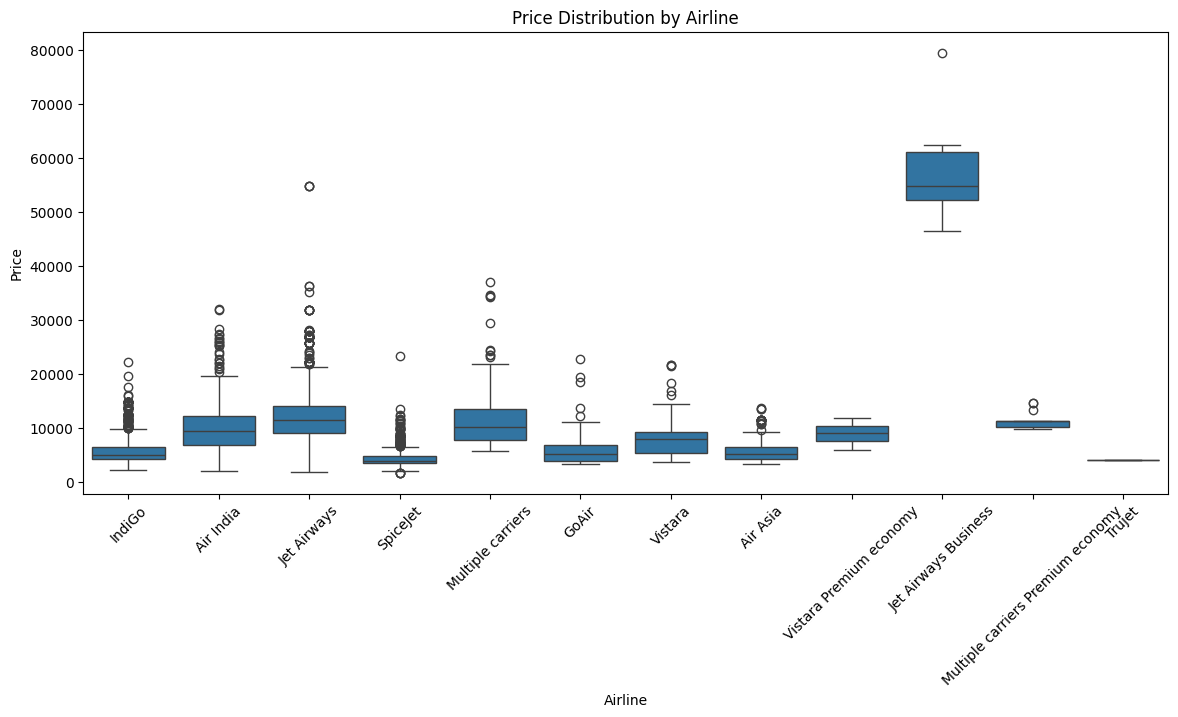

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.boxplot(x="Airline", y="Price", data=dt1)
plt.xticks(rotation=45)  # rotate airline labels if they overlap
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Price Distribution by Airline")
plt.show()


In [ ]:
dt1.corr()

ValueError: could not convert string to float: 'IndiGo'

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..


In [ ]:
dt1['Additional_Info'].value_counts()#/len(data)*100

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [ ]:
dt1['j_year'].unique()

array([2019], dtype=int32)

In [ ]:
dt1.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins,dur_totalmin,Duration_Bins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,1,10,22,20,2,50,170,"(120, 240]"
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,13,15,5,50,7,25,445,"(360, 600]"
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,2019,9,4,25,9,25,19,0,1140,"(600, 1200]"
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,23,30,18,5,5,25,325,"(240, 360]"


Handling Categorical Data

*   We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order -->       LabelEncoder is used in this case

But in real-world , it is not necessary that u have to always One-hot or label ,
hence we will discuss more interesting approaches in upcoming sessions to do this !



ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [ ]:
import pandas as pd

# Copy the dataframe
df_encoded = dt1.copy()

# Apply one-hot encoding only on specific columns
cols_to_encode = ["Airline", "Source", "Destination"]

df_encoded = pd.get_dummies(df_encoded, columns=cols_to_encode, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (10682, 37)


,Date_of_Journey,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,1,...,False,False,False,False,False,False,False,False,False,True
1,2019-05-01,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,13,...,False,False,False,True,False,False,False,False,False,False
2,2019-06-09,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,2019,9,4,...,False,False,True,False,False,True,False,False,False,False
3,2019-05-12,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,23,...,False,False,False,True,False,False,False,False,False,False
4,2019-03-01,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,2019,1,21,...,False,False,False,False,False,False,False,False,False,True


Why you might get True/False instead of 0/1

Boolean dtype in Pandas

By default, get_dummies produces uint8 (0/1).

But if the column you encode is already boolean-like (e.g., values Yes/No, True/False), pandas may keep the boolean type.

Example:

pd.get_dummies(pd.Series(["Yes", "No"]))


→ This gives 0/1.
But if:

pd.get_dummies(pd.Series([True, False]))


→ This stays as True/False.

Some versions of pandas / dtype inference

If Pandas infers the category as boolean, it may assign bool dtype.

In [ ]:
df_encoded = pd.get_dummies(dt1, columns=["Airline", "Source", "Destination"], drop_first=True)

# Force all dummy columns to int
df_encoded = df_encoded.astype(int)


ValueError: Cannot convert float NaN to integer

In [ ]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)


In [ ]:
df_encoded.head()


,Date_of_Journey,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,1,...,0,0,0,0,0,0,0,0,0,1
1,2019-05-01,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,13,...,0,0,0,1,0,0,0,0,0,0
2,2019-06-09,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,2019,9,4,...,0,0,1,0,0,1,0,0,0,0
3,2019-05-12,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,23,...,0,0,0,1,0,0,0,0,0,0
4,2019-03-01,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,2019,1,21,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_mean_encoded = dt1.copy()

# Columns to encode
cols_to_encode = ["Airline", "Source", "Destination"]

for col in cols_to_encode:
    # Compute mean Price per category
    mean_map = df_mean_encoded.groupby(col)["Price"].mean()

    # Replace categories with their mean Price
    df_mean_encoded[col + "_mean_encoded"] = df_mean_encoded[col].map(mean_map)

# Drop original categorical columns (optional)
df_mean_encoded.drop(cols_to_encode, axis=1, inplace=True)

df_mean_encoded.head()


,Date_of_Journey,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins,dur_totalmin,Duration_Bins,Airline_mean_encoded,Source_mean_encoded,Destination_mean_encoded
0,2019-03-24,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,1,10,22,20,2,50,170,"(120, 240]",5673.682903,8017.464269,11917.716738
1,2019-05-01,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,13,15,5,50,7,25,445,"(360, 600]",9612.427756,9158.389411,9158.389411
2,2019-06-09,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,2019,9,4,25,9,25,19,0,1140,"(600, 1200]",11643.923357,10540.113536,10540.113536
3,2019-05-12,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,23,30,18,5,5,25,325,"(240, 360]",5673.682903,9158.389411,9158.389411
4,2019-03-01,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,2019,1,21,35,16,50,4,45,285,"(240, 360]",5673.682903,8017.464269,11917.716738


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold

def kfold_target_encoding(data, col, target, n_splits=5, random_state=42):
    """
    Perform K-Fold target encoding for one categorical column.
    """
    df = dt1.copy()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    encoded_col = col + "_kfold_mean"
    df[encoded_col] = 0

    for train_idx, val_idx in kf.split(df):
        train_fold, val_fold = df.iloc[train_idx], df.iloc[val_idx]

        # Compute mean on train fold
        mean_map = train_fold.groupby(col)[target].mean()

        # Apply to validation fold
        df.loc[df.index[val_idx], encoded_col] = df.loc[df.index[val_idx], col].map(mean_map)

    return df


In [ ]:
df_kfold = dt1.copy()
cols_to_encode = ["Airline", "Source", "Destination"]

for col in cols_to_encode:
    df_kfold = kfold_target_encoding(df_kfold, col, target="Price")

# Drop original categorical columns if needed
df_kfold.drop(cols_to_encode, axis=1, inplace=True)

df_kfold.head()


/tmp/ipython-input-3673354607.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 5680.19976148  5680.19976148 11616.94559161 ... 10910.46750524
  7685.7617801   9708.08166189]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.index[val_idx], encoded_col] = df.loc[df.index[val_idx], col].map(mean_map)
/tmp/ipython-input-3673354607.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 7948.92949803  9185.61578718  7948.92949803 ... 10526.92790055
  7948.92949803 10526.92790055]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.index[val_idx], encoded_col] = df.loc[df.index[val_idx], col].map(mean_map)
/tmp/ipython-input-3673354607.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an 

,Date_of_Journey,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins,dur_totalmin,Duration_Bins,Destination_kfold_mean
0,2019-03-24,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,1,10,22,20,2,50,170,"(120, 240]",11686.410290
1,2019-05-01,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,13,15,5,50,7,25,445,"(360, 600]",9132.693745
2,2019-06-09,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,2019,9,4,25,9,25,19,0,1140,"(600, 1200]",10549.281988
3,2019-05-12,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,23,30,18,5,5,25,325,"(240, 360]",9185.615787
4,2019-03-01,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,2019,1,21,35,16,50,4,45,285,"(240, 360]",12073.405479


Exactly 💡 — that’s one of the trade-offs with **One-Hot Encoding**: you can end up with **too many columns (high-dimensional sparse data)**, especially for features like `Airline`, `Source`, `Destination`.

Here are some **strategies to reduce dimensionality** while still capturing useful info:

---

## 🔹 1. Use **Target Encoding / Mean Encoding**

Instead of creating dummy variables, replace categories with their **average price** (target variable mean).

```python
df_target_encoded = df.copy()

# Example: target encoding for Airline
df_target_encoded['Airline_encoded'] = df.groupby('Airline')['Price'].transform('mean')

# Drop original categorical
df_target_encoded.drop('Airline', axis=1, inplace=True)
```

✅ Much fewer dimensions, but be careful about **data leakage** (you should compute mean encoding inside cross-validation, not on the whole dataset at once).

---

## 🔹 2. Use **Frequency Encoding**

Replace categories with their frequency counts (how many times each category appears).

```python
df_freq_encoded = df.copy()

# Example: frequency encoding for Source
df_freq_encoded['Source_encoded'] = df['Source'].map(df['Source'].value_counts())
```

✅ Keeps only **1 column per feature**, useful when categories are many.

---

## 🔹 3. Keep only **Top-N categories**, group the rest as “Other”

For features like `Airline`, maybe only 3–5 airlines dominate bookings.

```python
top_airlines = df['Airline'].value_counts().nlargest(5).index
df['Airline_mod'] = df['Airline'].where(df['Airline'].isin(top_airlines), 'Other')
```

✅ This reduces dummy explosion.

---

## 🔹 4. Apply **Dimensionality Reduction (PCA)**

After One-Hot Encoding, you can apply **PCA** (Principal Component Analysis) to reduce dimensions while preserving variance.

```python
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(df.drop('Price', axis=1), drop_first=True)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=10)  # choose number of dimensions
X_pca = pca.fit_transform(X_scaled)
```

✅ Keeps the most important components, but loses interpretability.

---

## 🔹 5. Use **Tree-based Models** (Skip Encoding Explosion)

If you’re using models like **Random Forest, XGBoost, CatBoost, LightGBM**, they handle categorical features pretty well (especially CatBoost). You don’t even need full one-hot encoding.

---

👉 Do you want me to **implement Target Encoding and Frequency Encoding for your dataset** (with `Airline`, `Source`, `Destination` as examples) so you can compare with One-Hot Encoding?


Perfect 👍 Let’s carefully walk through your code line by line.

---

### Your Code

```python
data['Airline'].nunique()
data.groupby(['Airline'])['Price'].mean().sort_values()
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
data['Airline'] = data['Airline'].map(dict_airlines)
data['Airline']
```

---

### 🔹 Step-by-step Explanation

#### 1.

```python
data['Airline'].nunique()
```

* Counts **how many unique airlines** are in the column.
* Example: if you have 5 airlines → it returns `5`.

---

#### 2.

```python
data.groupby(['Airline'])['Price'].mean().sort_values()
```

* Groups the data by `Airline`.
* Calculates the **average Price** for each airline.
* Sorts them from **lowest to highest average Price**.
* Example output:

  ```
  Airline
  IndiGo          4500
  Air India       7000
  Jet Airways    12000
  ```

---

#### 3.

```python
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
```

* Same as above, but instead of getting the values, you take only the **sorted airline names (index)**.
* Example:

  ```python
  Index(['IndiGo', 'Air India', 'Jet Airways'], dtype='object')
  ```

---

#### 4.

```python
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
```

* Creates a dictionary mapping **airline name → rank number**.
* `enumerate` assigns numbers starting from `0`.
* Example:

  ```python
  {'IndiGo': 0, 'Air India': 1, 'Jet Airways': 2}
  ```
* Notice: the rank comes from their **average price order** (not alphabetical).

---

#### 5.

```python
data['Airline'] = data['Airline'].map(dict_airlines)
```

* Replaces each airline name in your dataset with the **rank number** from the dictionary.
* Example:

  ```
  Before:  ['IndiGo', 'Air India', 'Jet Airways', 'IndiGo']
  After:   [0, 1, 2, 0]
  ```

---

#### 6.

```python
data['Airline']
```

* Displays the transformed column.

---

### 🔹 What the code does overall

* Takes the `Airline` column (nominal text categories).
* Orders airlines by **average ticket price**.
* Assigns each airline an **integer rank (0,1,2…)**.
* Replaces the original names with those integers.

This is **Target Guided Ordinal Encoding** ✅.

---

👉 Do you want me to also rewrite this into **Mean Encoding** version of the same code (so instead of 0/1/2, each airline is replaced with its actual average price)?


In [ ]:
dt1['Airline'].nunique()
dt1.groupby(['Airline'])['Price'].mean().sort_values()
airlines = dt1.groupby(['Airline'])['Price'].mean().sort_values().index
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}
dict_airlines


{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
dt1['Airline'] = dt1['Airline'].map(dict_airlines)
dt1['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


Great observation 👌 You’re absolutely right:

* **Nominal data** (like *Airline*, *Source*, *Destination*) has **no natural order**.
* If we use **Label Encoding** (Air India=0, IndiGo=1, Jet Airways=2…), the model might wrongly assume *ordinality* (that Jet Airways > IndiGo > Air India).
* This can mislead algorithms that rely on distance or order (like **Linear Regression, Logistic Regression, KNN, SVM**).

---

### 🔹 So, is your current code “fine”?

Your code is doing **Target Guided Ordinal Encoding** (ordering categories by mean `Price`).

* For **tree-based models** (Decision Trees, Random Forests, XGBoost, LightGBM, CatBoost): ✅ **Perfectly fine.**

  * Trees don’t care about the magnitude/order of labels, they just split based on information gain.
  * Using rank-based encoding often works even better than One-Hot because it keeps dataset compact.
* For **linear models, KNN, distance-based algorithms**: ⚠️ **Not ideal**, because the order you imposed (0,1,2…) adds a false sense of ordinality.

  * In that case, **One-Hot Encoding** or **Mean Encoding** is safer.

---

### 🔹 Rule of Thumb

* If using **Tree Models** → Target Guided Ordinal Encoding (your method) is totally fine ✅.
* If using **Linear/Distance Models** → Use One-Hot Encoding or Mean Encoding ⚠️.
* If you want **leakage-safe Mean Encoding** → do **K-Fold Target Encoding** (what we discussed earlier).

---

👉 Do you want me to give you a **comparison table with pros & cons** of One-Hot, Label, Mean, and Target Guided encodings so you can decide when to use each?


In [ ]:
dt1['Destination'].nunique()
dt1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)


till now , Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar)
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same

In [ ]:
dt1['Destination'].replace('New Delhi', 'Delhi', inplace= True)
dt1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dt1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
# Order Sources by mean Price
sources = dt1.groupby(['Source'])['Price'].mean().sort_values().index

# Create dictionary {Source: rank}
dict_sources = {key: index for index, key in enumerate(sources, 0)}

# Map the Source column
dt1['Source'] = dt1['Source'].map(dict_sources)


In [ ]:
# Order Destinations by mean Price
destinations = dt1.groupby(['Destination'])['Price'].mean().sort_values().index

# Create dictionary {Destination: rank}
dict_destinations = {key: index for index, key in enumerate(destinations, 0)}

# Map the Destination column
dt1['Destination'] = dt1['Destination'].map(dict_destinations)


Here, the numbers (0,1,2) reflect the rank of mean ticket price for each city.

In [ ]:
dt1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins,dur_totalmin,Duration_Bins
0,3,2019-03-24,2,2,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,1,10,22,20,2,50,170,"(120, 240]"
1,7,2019-05-01,3,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,2019,1,13,15,5,50,7,25,445,"(360, 600]"
2,10,2019-06-09,4,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,2019,9,4,25,9,25,19,0,1140,"(600, 1200]"
3,3,2019-05-12,3,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,2019,12,23,30,18,5,5,25,325,"(240, 360]"
4,3,2019-03-01,2,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,2019,1,21,35,16,50,4,45,285,"(240, 360]"


In [ ]:
dt1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
#create mapping system
stops_map= {'non-stop=0', '1 stop = 1', '2 stops = 2', '3 stops = 3', '4 stops = 4'}
dt1['Total_Stops']= dt1['Total_Stops'].map(stops_map)

TypeError: 'set' object is not callable

In [ ]:
stops_map= {'non-stop':0, '1 stop': 1, '2 stops' : 2, '3 stops': 3, '4 stops': 4}
dt1['Total_Stops']= dt1['Total_Stops'].map(stops_map)

In [ ]:
dt1.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins,dur_totalmin,Duration_Bins
0,3,2019-03-24,2,2,BLR → DEL,2h 50m,0,No info,3897,3,2019,24,1,10,22,20,2,50,170,"(120, 240]"
1,7,2019-05-01,3,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,2019,1,13,15,5,50,7,25,445,"(360, 600]"
2,10,2019-06-09,4,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,2019,9,4,25,9,25,19,0,1140,"(600, 1200]"
3,3,2019-05-12,3,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,2019,12,23,30,18,5,5,25,325,"(240, 360]"
4,3,2019-03-01,2,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,2019,1,21,35,16,50,4,45,285,"(240, 360]"


In [ ]:
dt1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'j_month',
       'j_year', 'j_day', 'Arrival_Timehour', 'Arrival_Timemin',
       'Dep_Timehour', 'Dep_Timemin', 'dur_hour', 'dur_mins', 'dur_totalmin',
       'Duration_Bins'],
      dtype='object')

Drop the unecessary columns

In [ ]:
dt1.drop(['Date_of_Journey', 'Route', 'Duration', 'Additional_Info', 'dur_totalmin', 'Duration_Bins'], axis=1, inplace=True)

KeyError: "['Date_of_Journey', 'Route', 'Additional_Info', 'dur_totalmin', 'Duration_Bins'] not found in axis"

In [ ]:
dt1.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins
0,3,2,2,2h 50m,0,3897,3,2019,24,1,10,22,20,2,50
1,7,3,3,7h 25m,2,7662,5,2019,1,13,15,5,50,7,25
2,10,4,4,19h 0m,2,13882,6,2019,9,4,25,9,25,19,0
3,3,3,3,5h 25m,1,6218,5,2019,12,23,30,18,5,5,25
4,3,2,2,4h 45m,1,13302,3,2019,1,21,35,16,50,4,45


In [ ]:
dt1.drop(['Duration'], axis=1, inplace=True)

In [ ]:
dt1.head(5)

,Airline,Source,Destination,Total_Stops,Price,j_month,j_year,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins
0,3,2,2,0,3897,3,2019,24,1,10,22,20,2,50
1,7,3,3,2,7662,5,2019,1,13,15,5,50,7,25
2,10,4,4,2,13882,6,2019,9,4,25,9,25,19,0
3,3,3,3,1,6218,5,2019,12,23,30,18,5,5,25
4,3,2,2,1,13302,3,2019,1,21,35,16,50,4,45


In [ ]:
dt1.drop(['j_year'], axis=1, inplace=True)

In [ ]:
dt1.head(5)

,Airline,Source,Destination,Total_Stops,Price,j_month,j_day,Arrival_Timehour,Arrival_Timemin,Dep_Timehour,Dep_Timemin,dur_hour,dur_mins
0,3,2,2,0,3897,3,24,1,10,22,20,2,50
1,7,3,3,2,7662,5,1,13,15,5,50,7,25
2,10,4,4,2,13882,6,9,4,25,9,25,19,0
3,3,3,3,1,6218,5,12,23,30,18,5,5,25
4,3,2,2,1,13302,3,1,21,35,16,50,4,45


outlier detection

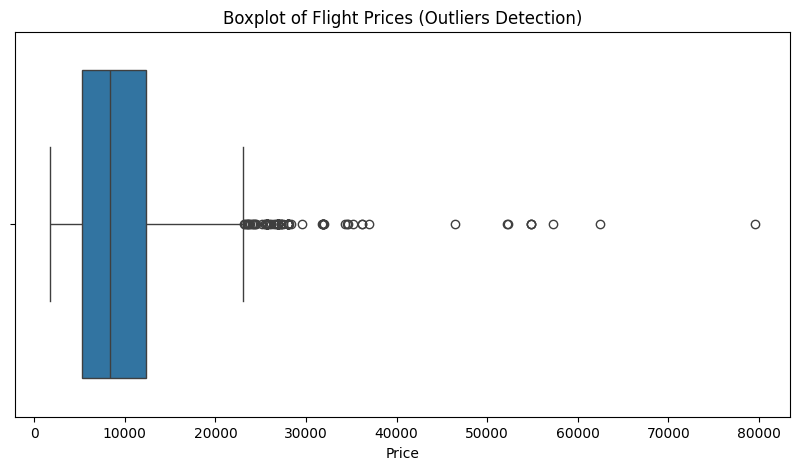

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=dt1['Price'])
plt.title("Boxplot of Flight Prices (Outliers Detection)")
plt.xlabel("Price")
plt.show()


If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR
          


In [ ]:
q1 = dt1['Price'].quantile(0.25)
q3 = dt1['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr
print(maximum)
print(minimum)
print([price for price in dt1['Price'] if price> maximum or price<minimum])
len([price for price in dt1['Price'] if price> maximum or price<minimum])
dt1['Price'] = np.where(dt1['Price']>=35000 , dt1['Price'].median() , dt1['Price'])

23017.0
-5367.0
[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


Why Median?

Median is more robust to outliers than mean.

By replacing extreme values (≥ 35000) with the median, you cap extreme outliers without distorting the distribution too much.

Good question 👍 Let’s weigh this carefully.

---

### 🔹 What you did

You **trimmed (capped) prices ≥ 35,000** and replaced them with the **median**.

---

### 🔹 When is this good?

* If **outliers are errors** (e.g., data entry mistake like an extra 0 → 350,000 instead of 35,000).
* If extreme values are **very rare and distort your model** (e.g., regression line gets pulled upwards).
* If you want a **robust model for the majority** (most tickets are < 35,000).

---

### 🔹 When is it not good?

* If those high prices are **genuine cases** (e.g., business class, international flights).
* If predicting **premium flight prices** is important for your use case.
* You might lose information: the difference between a 35k ticket and a 60k ticket vanishes (both become median).

---

### 🔹 Alternatives to Trimming

1. **Log Transformation**

   * Apply:

     ```python
     data['Price_log'] = np.log1p(data['Price'])
     ```
   * This compresses large values instead of cutting them off.

2. **Capping (Winsorizing)**

   * Instead of replacing with the median, cap values at the threshold.

     ```python
     data['Price'] = np.where(data['Price'] > 35000, 35000, data['Price'])
     ```
   * Keeps the “extreme” but not too extreme.

3. **Model-Specific Handling**

   * Some ML models (tree-based like Random Forest, XGBoost) are robust to outliers → you may not need trimming at all.

---

✅ **Conclusion:**

* If your dataset is mostly domestic flights (India dataset usually is), then trimming above **35k** is reasonable.
* If you want to model **luxury/rare tickets too**, better use **log transform** or **capping** instead of replacing with the median.

---

👉 Do you want me to quickly show you how the **boxplot looks before vs after trimming** so you can visually check if 35k is a good cutoff?


Feature Selection

Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable.
    
    
    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features
    
'''

Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables.
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Define features (X) and target (y)
X = dt1.drop("Price", axis=1)
y = dt1["Price"]


In [ ]:
# Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=42)

# Store results in DataFrame
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_results)


Mutual Information Scores:
 Airline             1.317499
Arrival_Timehour    1.135564
dur_hour            1.112262
Source              1.056731
Destination         1.052861
Dep_Timehour        0.919159
Arrival_Timemin     0.892554
Total_Stops         0.792679
Dep_Timemin         0.758474
dur_mins            0.671041
j_month             0.633571
j_day               0.374371
dtype: float64


In [ ]:
# Random Forest Feature Importance
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", rf_importance)


Random Forest Feature Importance:
 dur_hour            0.485634
Airline             0.138573
j_day               0.134617
j_month             0.062848
Arrival_Timehour    0.029481
Dep_Timehour        0.027986
Dep_Timemin         0.024004
Total_Stops         0.022218
Arrival_Timemin     0.021955
dur_mins            0.021791
Source              0.015615
Destination         0.015277
dtype: float64


In [ ]:
# Combine into one DataFrame
feature_importance = pd.DataFrame({
    "Mutual_Info": mi_results,
    "RandomForest": rf_importance
})

print(feature_importance.sort_values("RandomForest", ascending=False))


                  Mutual_Info  RandomForest
dur_hour             1.112262      0.485634
Airline              1.317499      0.138573
j_day                0.374371      0.134617
j_month              0.633571      0.062848
Arrival_Timehour     1.135564      0.029481
Dep_Timehour         0.919159      0.027986
Dep_Timemin          0.758474      0.024004
Total_Stops          0.792679      0.022218
Arrival_Timemin      0.892554      0.021955
dur_mins             0.671041      0.021791
Source               1.056731      0.015615
Destination          1.052861      0.015277


In [ ]:
# Sort by Mutual Information
print("Sorted by Mutual Information:\n")
print(feature_importance.sort_values("Mutual_Info", ascending=False))

# Sort by Random Forest Importance
print("\nSorted by Random Forest:\n")
print(feature_importance.sort_values("RandomForest", ascending=False))


Sorted by Mutual Information:

                  Mutual_Info  RandomForest
Airline              1.317499      0.138573
Arrival_Timehour     1.135564      0.029481
dur_hour             1.112262      0.485634
Source               1.056731      0.015615
Destination          1.052861      0.015277
Dep_Timehour         0.919159      0.027986
Arrival_Timemin      0.892554      0.021955
Total_Stops          0.792679      0.022218
Dep_Timemin          0.758474      0.024004
dur_mins             0.671041      0.021791
j_month              0.633571      0.062848
j_day                0.374371      0.134617

Sorted by Random Forest:

                  Mutual_Info  RandomForest
dur_hour             1.112262      0.485634
Airline              1.317499      0.138573
j_day                0.374371      0.134617
j_month              0.633571      0.062848
Arrival_Timehour     1.135564      0.029481
Dep_Timehour         0.919159      0.027986
Dep_Timemin          0.758474      0.024004
Total_Stops       

🔹 Why the Difference?

How Mutual Information Works

MI measures any dependency (linear or nonlinear) between a feature and the target (Price).

It’s univariate → each feature is evaluated independently with respect to Price.

Result: MI scores can be high if there is any relationship, even if the feature overlaps strongly with others.

How Random Forest Importance Works

RF looks at how much each feature reduces prediction error in decision trees.

It’s multivariate → if two features are correlated (e.g., dur_hour and dur_totalmin), RF will split importance between them, often lowering individual scores.

Result: RF tends to be more conservative with redundant features.

Interpretation

Big MI scores (like >1) just mean "this feature shares a lot of information with Price".

RF scores are relative (all sum to 1) → they show practical usefulness in prediction.

Takeaway:

Mutual Info shows: Airline, Arrival/Dep time, and duration are all informative.

Random Forest shows: dur_hour, Airline, and j_day are the most practically useful for predicting Price.

Build ML models

split dataset into train & test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [90]:
from sklearn.ensemble import RandomForestRegressor


In [91]:
ml_model = RandomForestRegressor()


In [92]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [94]:
y_pred = ml_model.predict(X_test)
y_pred

array([16849.03,  5376.71,  8815.1 , ...,  3546.19,  6343.23,  6860.62])

In [95]:
from sklearn import metrics

In [96]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 3665423.72028611
R-squared: 0.8117167096467965
Mean Absolute Error: 1178.913789165928


In [98]:
y_train_pred = ml_model.predict(X_train)

print("Train R²:", metrics.r2_score(y_train, y_train_pred))
print("Test R²:", metrics.r2_score(y_test, y_pred))

Train R²: 0.9514234713124586
Test R²: 0.8117167096467965


R² (coefficient of determination) measures how much of the variance in the target variable (y) can be explained by the model.

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # start with k=5
knn.fit(X_train_scaled, y_train)

# 4. Predictions
y_pred = knn.predict(X_test_scaled)

# 5. Evaluation
print("R² Score:", metrics.r2_score(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))


R² Score: 0.7450216704715114
Mean Squared Error: 4963816.042620742
Mean Absolute Error: 1455.5371022089105


In [100]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Scale features (polynomial features can blow up values)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Create polynomial features (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 4. Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 5. Predictions
y_pred = model.predict(X_test_poly)

# 6. Evaluation
print("R² Score:", metrics.r2_score(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))


R² Score: 0.6510828457934694
Mean Squared Error: 6792579.474493893
Mean Absolute Error: 1837.772420701136


In [101]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 2. Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,   # number of trees
    learning_rate=0.1,  # step size
    max_depth=3,        # depth of individual trees
    random_state=42
)

# 3. Fit model
gbr.fit(X_train, y_train)

# 4. Predictions
y_pred = gbr.predict(X_test)

# 5. Evaluation
print("R² Score:", metrics.r2_score(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))


R² Score: 0.7767311974677462
Mean Squared Error: 4346507.665477892
Mean Absolute Error: 1461.7572335440684


# Hyperparameter tuning

Import Required Modules

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


Define Parameter Grid

In [103]:
param_grid = {
    "n_estimators": [100, 200, 300],   # number of boosting stages (trees)
    "learning_rate": [0.05, 0.1, 0.2], # shrinkage step size
    "max_depth": [3, 4, 5],            # depth of trees
    "subsample": [0.8, 1.0]            # sample fraction for each tree
}


Setup GridSearchCV

In [104]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,                 # 3-fold cross-validation
    scoring="r2",         # use R² as scoring
    n_jobs=-1,            # use all CPU cores
    verbose=2
)


Fit GridSearch

In [105]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (R²):", grid_search.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score (R²): 0.8165094141148707


advantage of dumping--
imagine in future we have new data & lets say we have to predict price on this huge data

then to do prediction on this new data , we can use this pre-trained model what we have dumped..

In [106]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [107]:
import pickle

In [108]:
# open a file, where you want to store the data
#file = open('rf_random.pkl' , 'wb')

In [109]:
with open("gradient_boosting.pkl", "wb") as f:
    pickle.dump(gbr, f)


In [110]:
import pickle

# Save Gradient Boosting model
with open("gradient_boosting.pkl", "wb") as f:
    pickle.dump(gbr, f)

# Load it back later
with open("gradient_boosting.pkl", "rb") as f:
    gbr_loaded = pickle.load(f)

# Now you can use it for prediction
y_pred = gbr_loaded.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [111]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# 1. Train the model
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gbr.fit(X_train, y_train)   # make sure you fit it before saving

# 2. Save the trained model
joblib.dump(gbr, "gradient_boosting.joblib")

# 3. Load the model
gbr_loaded = joblib.load("gradient_boosting.joblib")

# 4. Predict with loaded model
y_pred = gbr_loaded.predict(X_test)



How to automate ml pipeline & How to define your Evaluation metric..